# การสร้างโมเดลจำแนกเซลล์มะเร็ง


## 1. import library

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


## 2.รับ dataset มาไว้ในตัวแปร df

In [ ]:
#รับ input มาในตัวแปร df
df = pd.read_csv('Cancer_Data.csv')
df = df.drop(df.columns[-1],axis=1)


## 3.แสดงชุดข้อมูล <br> -target column คือ diagnosi(ชนิดเซลล์มะเร็ง) <br> -ข้อมูลมี 32 attribute <br> -569 ตัวอย่าง


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 4.ดูค่าตัวเลขของแต่ละข้อมูลเพื่อทำการปรับสเกล

In [ ]:
#show statistics
statistics = df.describe()
print(statistics)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## 5.ดูจำนวนข้อมูลของแต่ละประเภทเซลมะเร็ง<br> สังเกตุความ imbalanced Dataset เพื่อนำไปวิเคราะห์ในขั้นตอนการวัดประสิทธิภาพ

In [ ]:
M = df.loc[df.iloc[:,1] == 'M'] #Cancer type M
B = df.loc[df.iloc[:,1] == 'B'] #Cancer type B

In [ ]:
M.describe() #statistics M type

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.120000e+02,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,1.378965e+08,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,8.670000e+03,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.613450e+05,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,8.953665e+05,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,8.911290e+06,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [ ]:
B.describe() #statistics B type

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


## 6.กราฟระหว่างรัศมีและลักษณะพื้นของเซลล์มะเร็ง <br> 

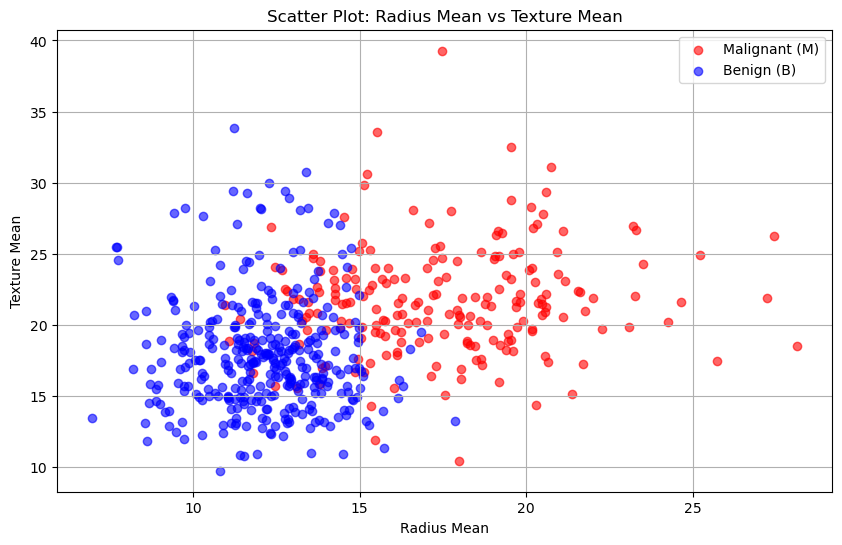

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(M['radius_mean'], M['texture_mean'], color='red', label='Malignant (M)', alpha=0.6)
plt.scatter(B['radius_mean'], B['texture_mean'], color='blue', label='Benign (B)', alpha=0.6)
plt.title('Scatter Plot: Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.grid(True)
plt.show()



## 7.กราฟระหว่างขนาดพื้นที่และชนิดของเซลล์มะเร็ง <br> 

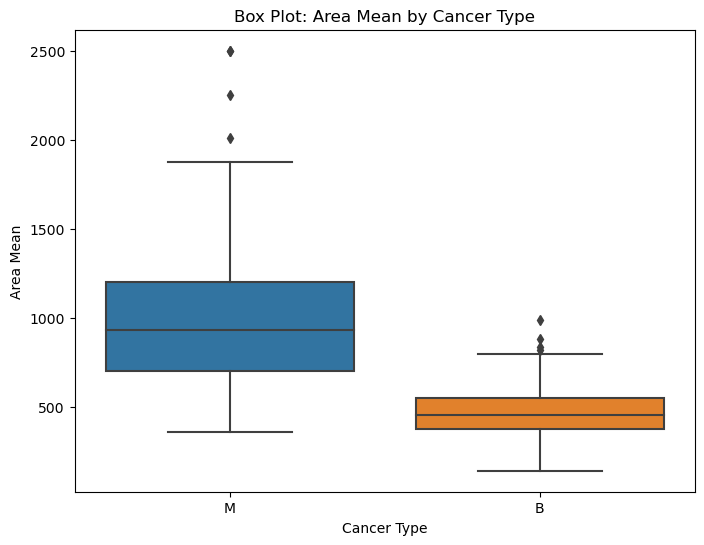

             Min     Q1  Q2 (Median)       Q3     Max     IQR  IQR * 1.5  \
diagnosis                                                                  
B          143.5  378.2        458.4   551.10   992.1  172.90    259.350   
M          361.6  705.3        932.0  1203.75  2501.0  498.45    747.675   

           Outlier_Q1  Outlier_Q3  
diagnosis                          
B             118.850     810.450  
M             -42.375    1951.425  


In [ ]:
# 2. Box plot of area_mean grouped by cancer type
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Box Plot: Area Mean by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Area Mean')
plt.show()

grouped = df.groupby('diagnosis')['area_mean']

# คำนวณ Q1, Q2, IQR และ IQR*1.5
Min = grouped.min()
Max = grouped.max()
Q1 = grouped.quantile(0.25)
Q2 = grouped.median()
Q3 = grouped.quantile(0.75)
IQR = Q3 - Q1
IQR_1_5 = IQR * 1.5
Outlier_Q1 = Q1-IQR_1_5
Outlier_Q3 = Q3+IQR_1_5


# แสดงผลลัพธ์
result = pd.DataFrame({
    'Min' : Min,
    'Q1': Q1,
    'Q2 (Median)': Q2,
    'Q3': Q3,
    'Max' : Max,
    'IQR': IQR,
    'IQR * 1.5': IQR_1_5,
    'Outlier_Q1' : Outlier_Q1,
    'Outlier_Q3' : Outlier_Q3
})

print(result)

## 8.กราฟแสดงความถี่เส้นรอบวงที่พบของแต่ละชนิดเซลล์มะเร็ง <br> 

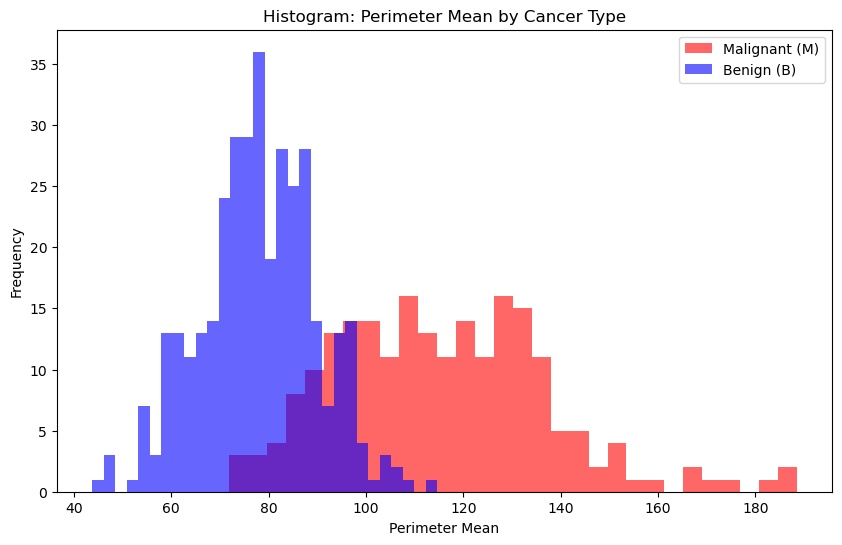

In [ ]:
# 3. Histogram of perimeter_mean for both types
plt.figure(figsize=(10, 6))
plt.hist(M['perimeter_mean'], bins=30, alpha=0.6, color='red', label='Malignant (M)')
plt.hist(B['perimeter_mean'], bins=30, alpha=0.6, color='blue', label='Benign (B)')
plt.title('Histogram: Perimeter Mean by Cancer Type')
plt.xlabel('Perimeter Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## แยกข้อมูลที่ใช้
X: เป็นข้อมูลที่ใช้เป็นข้อมูลทำนาย(Input) และ
y: เป็นคอลัมน์ diagnosis ซึ่งบอกว่าเซลล์เป็นชนิดใด โดยที่กำหนดให้ 
M (Malignant): เซลล์มะเร็ง B (Benign): เซลล์ไม่ใช่มะเร็ง

In [ ]:
X = df.drop('diagnosis', axis=1)
y = LabelEncoder().fit_transform(df['diagnosis'])  # Encode 'M' as 1 and 'B' as 0

## แบ่งข้อมูลที่ใช้ในการ Train/Test
ข้อมูลที่ในการtrain คือ 70% และในการ test คือ 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## สร้างฟังก์ชั่นสำหรับ Train Model และ ประเมิน
ในฟังก์ชั่นนี้จะทำการ train และ test แล้วคำนวณ Accuracy,Precision,Recall,F1 Score,AUC แล้วจึงสร้าง ROC Curve และ พิมพ์ผลลัพธ์และแสดง ROC Curve 

In [ ]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    
    #คำนวณผลลัพธ์
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    #ทำ confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

## สร้างโมเดล
โมเดลที่สร้างคือ Logistic Regression , Random Forest Classifier , Support Vector Machine(SVM)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)

## ประเมินผลโมเดล
ใช้ฟังก์ชั่นที่สร้างขึ้นมาประเมินผลโมเดล

<Figure size 1000x800 with 0 Axes>

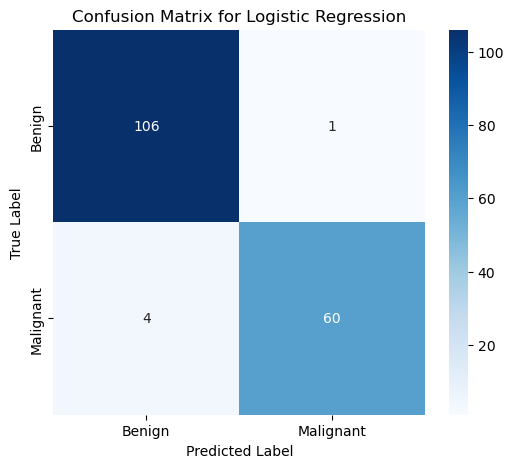

Model: Logistic Regression
Accuracy: 0.97
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
AUC: 1.00


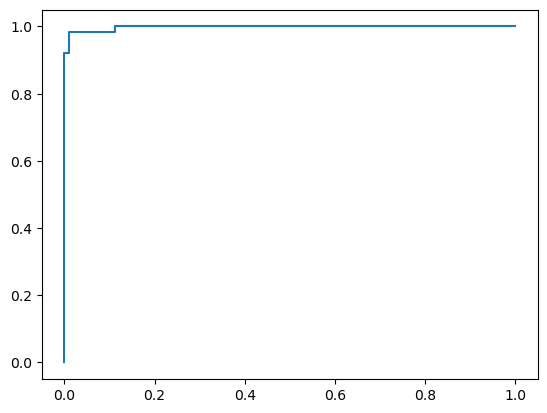

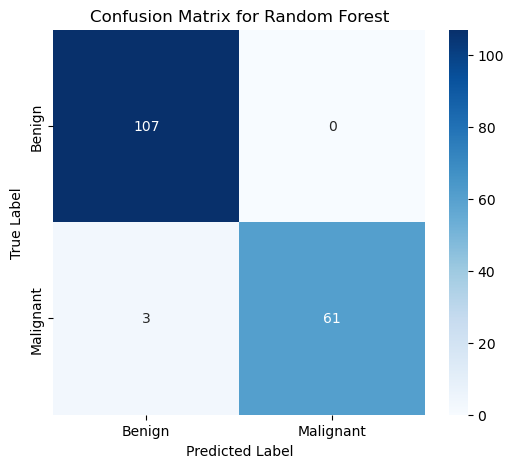

Model: Random Forest
Accuracy: 0.98
Precision: 1.00
Recall: 0.95
F1 Score: 0.98
AUC: 1.00


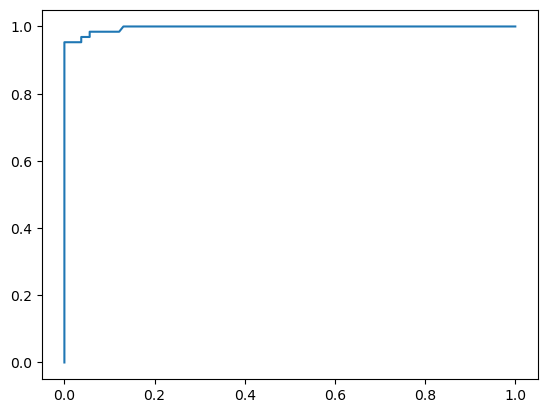

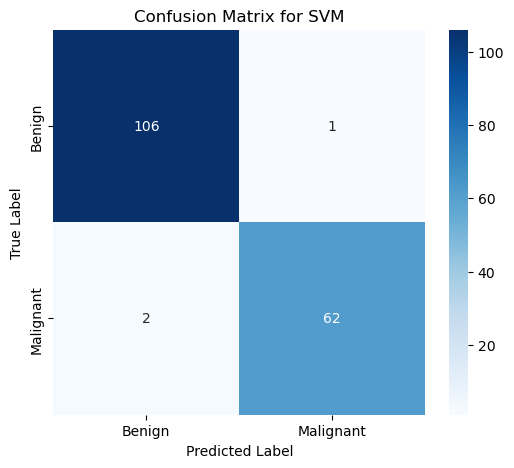

Model: SVM
Accuracy: 0.98
Precision: 0.98
Recall: 0.97
F1 Score: 0.98
AUC: 1.00


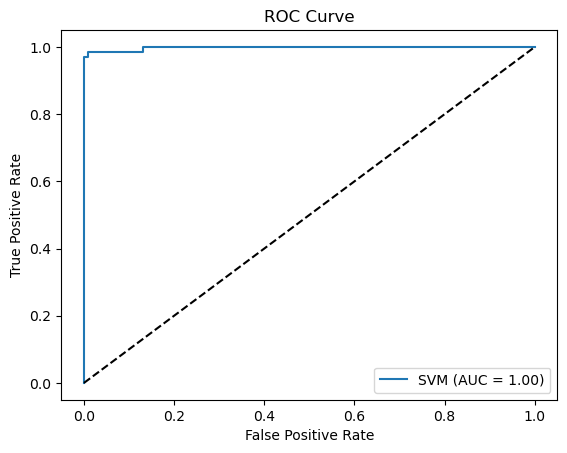

In [ ]:
# Evaluate each model
plt.figure(figsize=(10, 8))
evaluate_model(log_reg, 'Logistic Regression')
evaluate_model(random_forest, 'Random Forest')
evaluate_model(svm_model, 'SVM')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(svm_model, open('model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))


In [ ]:
X_input = X_test[-1,:].reshape(1,31)

In [ ]:
model.predict(X_input)

array([1])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])